# Homework Week 22, Heather Leighton-Dick

In [1]:
#the kitchen sink
import time
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
from splinter import Browser
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

#make it go
executable_path = {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

soup = bs(browser.html, 'html.parser')





====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/hleighto/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


## 1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as needed.

In [5]:
#visit the url
url = 'https://iowacity.craigslist.org/'
browser.visit(url)

#tell the browser to click on "Furniture" link
browser.links.find_by_partial_text('furniture').click()
time.sleep(5)

In [27]:
#scraping the information
soup = bs(browser.html, 'html.parser')

all_lis = soup.find_all('li', class_ = 'result-row')

antique_list = []

#extract information and create a dictionary to append to the list
#grab enough iterations to allow for culling ads
for li in all_lis[:55]:
    
    try:        
        # 5 variables and where to find them
        item = li.find('h3', class_= 'result-heading').find('a').contents[0]
        print(item)
        
        price = li.find('span', class_= 'result-price').contents[0]
        print(price)
        
        location = li.find('span', class_='result-hood').string
        location = location.replace('(','').replace(')','').strip()
        print(location)
        
        date_posted = li.find('time', class_= 'result-date')['datetime']
        print(date_posted)
        
        link = li.find('h3', class_= 'result-heading').find('a')['href']
        print(link)

        
        #dictionary
        antique_dict = {'item': item,
                        'price': price, 
                    'city': location, 
                    'date_posted': date_posted, 
                    'direct_link': link}
        
        
        #tiny if-else to skip ads
        if "/fud/" in link:
            pass
        else:
            antique_list.append(antique_dict)
        
    except Exception as e:
            print(e)

Metal bar Stool with back set of 2
$65
North Liberty
2022-03-02 21:32
https://iowacity.craigslist.org/fuo/d/north-liberty-metal-bar-stool-with-back/7451300094.html
Rustic wood free standing shelf
$75
North Liberty
2022-03-02 21:32
https://iowacity.craigslist.org/fuo/d/north-liberty-rustic-wood-free-standing/7451300516.html
Round oak table with extension & chairs
$450
North Liberty
2022-03-02 21:32
https://iowacity.craigslist.org/fuo/d/north-liberty-round-oak-table-with/7451301581.html
Solid wood computer desk
$80
North Liberty
2022-03-02 21:32
https://iowacity.craigslist.org/fuo/d/north-liberty-solid-wood-computer-desk/7451379986.html
Glass top coffee table & end table set - 3 piece
$100
North Liberty
2022-03-02 21:31
https://iowacity.craigslist.org/fuo/d/north-liberty-glass-top-coffee-table/7451384605.html
Sofa + loveseat (new)
$480
Iowa City
2022-03-02 20:17
https://iowacity.craigslist.org/fuo/d/iowa-city-sofa-loveseat-new/7453107717.html
King size mattress 12 inch, new
$350
Iowa cit

In [28]:
#create a dataframe from the list and display the information
craigslistia_df = pd.DataFrame(antique_list)
craigslistia_df

,item,price,city,date_posted,direct_link
0,Metal bar Stool with back set of 2,$65,North Liberty,2022-03-02 21:32,https://iowacity.craigslist.org/fuo/d/north-li...
1,Rustic wood free standing shelf,$75,North Liberty,2022-03-02 21:32,https://iowacity.craigslist.org/fuo/d/north-li...
2,Round oak table with extension & chairs,$450,North Liberty,2022-03-02 21:32,https://iowacity.craigslist.org/fuo/d/north-li...
3,Solid wood computer desk,$80,North Liberty,2022-03-02 21:32,https://iowacity.craigslist.org/fuo/d/north-li...
4,Glass top coffee table & end table set - 3 piece,$100,North Liberty,2022-03-02 21:31,https://iowacity.craigslist.org/fuo/d/north-li...
5,Sofa + loveseat (new),$480,Iowa City,2022-03-02 20:17,https://iowacity.craigslist.org/fuo/d/iowa-cit...
6,"King size mattress 12 inch, new",$350,Iowa city,2022-03-02 17:57,https://iowacity.craigslist.org/fuo/d/iowa-cit...
7,child's picnic table,$65,Iowa City,2022-03-02 17:27,https://iowacity.craigslist.org/fuo/d/iowa-cit...
8,child's picnic table,$65,Iowa City,2022-03-02 17:27,https://iowacity.craigslist.org/fuo/d/iowa-cit...
9,Desk,$20,Iowa City,2022-03-02 14:03,https://iowacity.craigslist.org/fuo/d/coralvil...


In [29]:
#export dataframe to json
craigslistia_df.to_json(r'craigslistia.json')

## 2.	Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

In [ ]:
#pip install flask
from flask import Flask, json, render_template, request
import os

#create instance of Flask app
app = Flask(__name__)

#decorator
@app.route("/")
def echo_hello():
    return """Furniture for Sale in the Iowa City area:
            Add "all" to the end of the URL above to see all the options! """

@app.route("/all")
def furn_data():
    json_url = os.path.join(app.static_folder,"","craigslistia.json")
    data_json = json.load(open(json_url))

    return render_template('index.html',data=data_json)

if __name__ == "__main__":
    app.run(debug=True)

## 3.	What is web scraping? Why is it helpful? What does it mean for your online presence?Refence the readings and DataCamp.

Web scraping is a kind of data scraping, which is a technique for programmatically extracting human-readable material from another program. Web scraping specifically fetches a web page (i.e. downloads it) and then extracts  in, ignoring all formatting or adjacent information, and copies it to another location, typically for compiling or analyzation purposes.

Web scraping can be used for data mining, research, price comparisons, weather data monitoring, and gathering listings (business contacts, real estate, etc.). It can also be useful for tracking the online presence/reputation of a particular business by finding online reviews of service or products as well as inclusion in compilations or mentions on social media. This tracking information can then be used to drive business marketing strategies and other initiatives.

Web scraping speeds up the process of information retrieval, but should be applied considerately and conscienciously so as not to inconvenience the owner of the website by tying up bandwidth with requests or by copying or sharing copyrighted information.

## Web Scraping cert
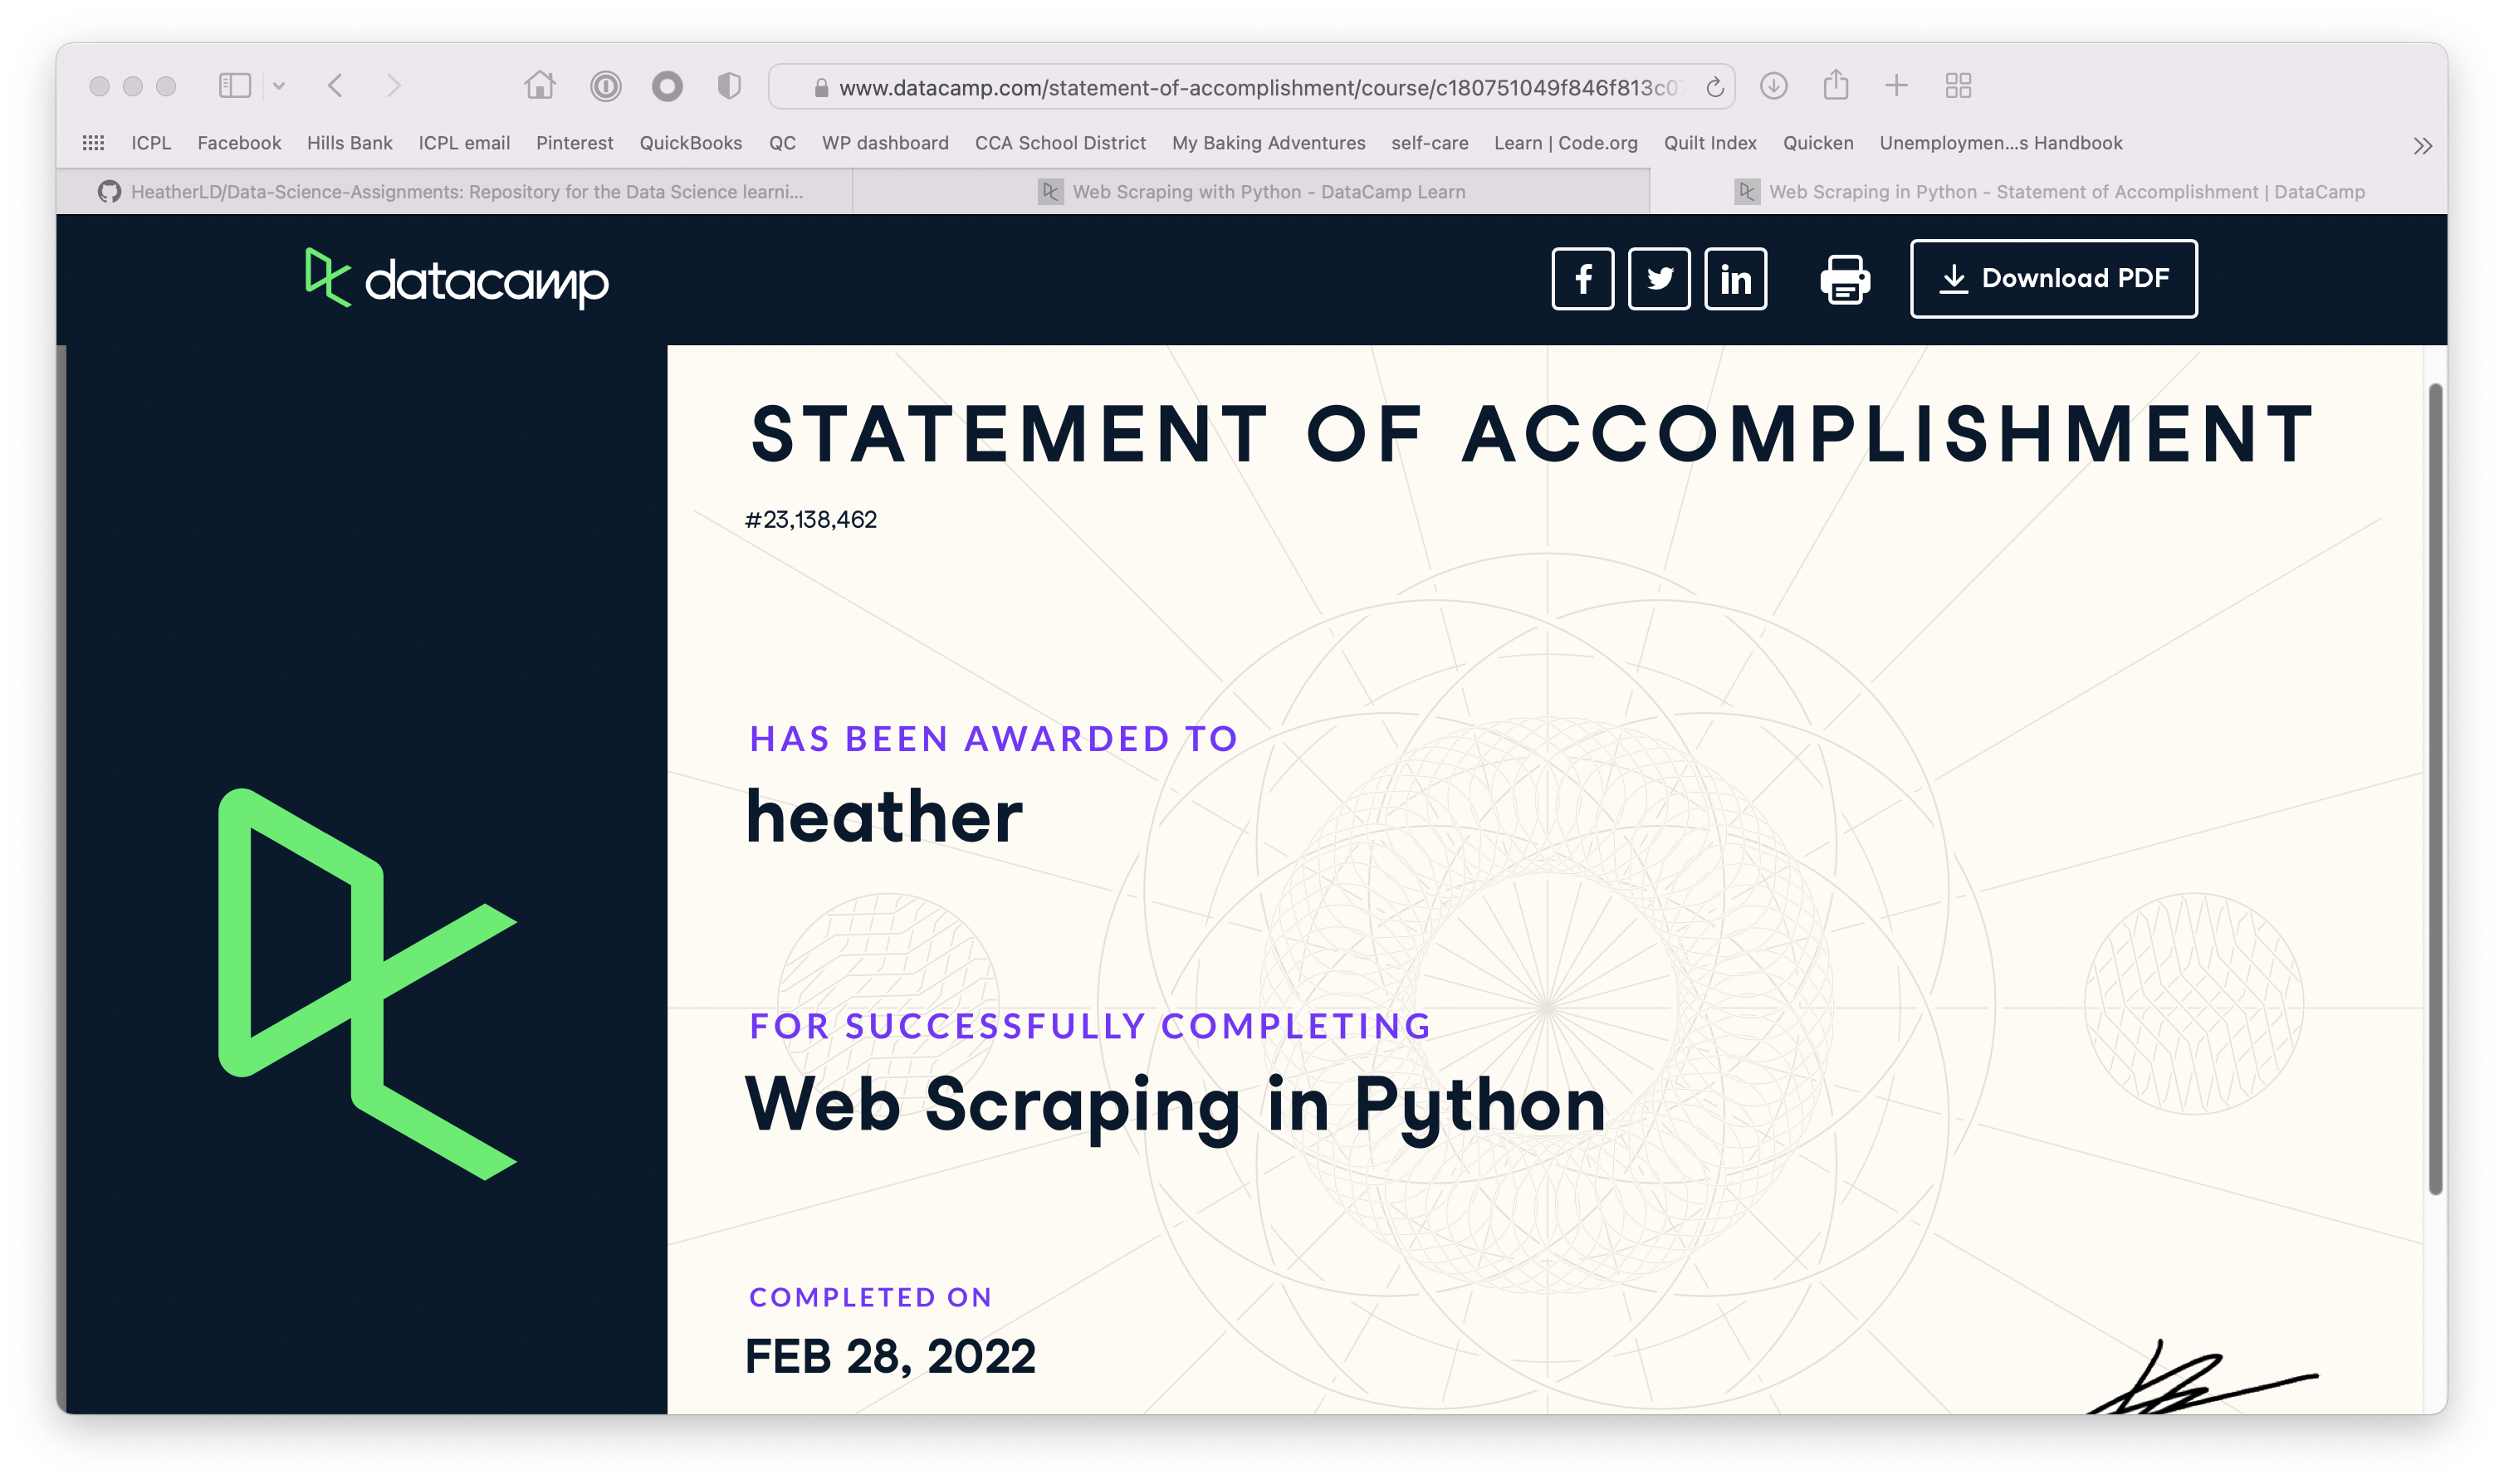

## Mongo Datacamp progress